In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd /content/drive/MyDrive/Project 2

/content/drive/MyDrive/Project 2


In [3]:
!ls

AD.csv	final_AD_CN	Meta_Score.csv	Preprocess.ipynb
CN.csv	meta_score.csv	MMSE_CDR.csv	Untitled0.ipynb


In [5]:
data = pd.read_csv('final_AD_CN')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,subj_id,aparc-area-lh-stats_BrainSegVolNotVent,aparc-area-lh-stats_eTIV,aparc-area-lh-stats_lh_WhiteSurfArea_area,aparc-area-lh-stats_lh_bankssts_area,aparc-area-lh-stats_lh_caudalanteriorcingulate_area,aparc-area-lh-stats_lh_caudalmiddlefrontal_area,aparc-area-lh-stats_lh_cuneus_area,aparc-area-lh-stats_lh_entorhinal_area,aparc-area-lh-stats_lh_frontalpole_area,...,aseg-volume-stats_lhCerebralWhiteMatterVol,aseg-volume-stats_lhCortexVol,aseg-volume-stats_lhSurfaceHoles,aseg-volume-stats_non-WM-hypointensities,aseg-volume-stats_rhCerebralWhiteMatterVol,aseg-volume-stats_rhCortexVol,aseg-volume-stats_rhSurfaceHoles,Diagnosis,MMSE,CDR
0,037_S_0627,940789.0,1.399898e+06,73827.5,946.0,515.0,2229.0,1224.0,369.0,216.0,...,202670.754230,183568.933574,25.0,0.0,206030.360988,179393.804209,19.0,1,23.0,1.0
1,031_S_4024,942502.0,1.373115e+06,74736.1,766.0,512.0,1542.0,1487.0,339.0,215.0,...,197122.503992,174585.150641,20.0,0.0,202275.775769,189443.316723,35.0,1,26.0,1.0
2,005_S_1341,878454.0,1.322552e+06,75226.7,628.0,493.0,1916.0,1185.0,365.0,194.0,...,208354.748880,154352.670665,24.0,0.0,204781.255534,160295.940940,17.0,1,24.0,1.0
3,137_S_0366,852737.0,1.294383e+06,65601.4,624.0,566.0,1494.0,1333.0,369.0,176.0,...,190807.975419,146693.427276,6.0,0.0,195886.126027,156741.469172,7.0,1,23.0,1.0
4,037_S_4028,986265.0,1.278342e+06,74119.0,874.0,470.0,1597.0,1545.0,280.0,255.0,...,206181.411480,197822.276549,26.0,0.0,203815.844861,198185.500687,16.0,0,30.0,0.0


In [6]:
data.dtypes

subj_id                                       object
aparc-area-lh-stats_BrainSegVolNotVent       float64
aparc-area-lh-stats_eTIV                     float64
aparc-area-lh-stats_lh_WhiteSurfArea_area    float64
aparc-area-lh-stats_lh_bankssts_area         float64
                                              ...   
aseg-volume-stats_rhCortexVol                float64
aseg-volume-stats_rhSurfaceHoles             float64
Diagnosis                                      int64
MMSE                                         float64
CDR                                          float64
Length: 362, dtype: object

In [7]:
data = data.drop(["subj_id"], axis=1) 

In [8]:
X = data.drop(['Diagnosis'],axis=1)
y = data['Diagnosis']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (298, 360) (298,)
Test set: (128, 360) (128,)


In [10]:
'''Feature Scaling'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def visualize_cf_matrix(y,y_pred):
  cm = confusion_matrix(y,y_pred)
  cm_df = pd.DataFrame(cm)
  plt.figure(figsize=(6,5))
  sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
  plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y,y_pred)))
  plt.ylabel('True Values')
  plt.xlabel('Predicted Values')
  plt.show()
  return

def ROC_AUC(y,y_prob):
  fpr, tpr, threshold = roc_curve(y, y_prob)
  model_auc = roc_auc_score(y, y_prob)
  roc_auc = auc(fpr, tpr)

  plt.plot([0,1], [0,1], '--', label='No skill')
  plt.plot(fpr, tpr, marker='.', label='roc auc {}'.format(roc_auc))
  # show axis labels and the legend
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show(block=False)
  return

In [29]:
#XGB

xgb = XGBClassifier(random_state = 17, learning_rate= 0.3, max_depth = 8, objective = 'binary:logistic', eval_metric = 'logloss', early_stopping_rounds=100)
eval_set = [(X_train, y_train),(X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=3)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.454931	validation_1-logloss:0.458524
[3]	validation_0-logloss:0.175651	validation_1-logloss:0.206591
[6]	validation_0-logloss:0.082444	validation_1-logloss:0.118108
[9]	validation_0-logloss:0.044565	validation_1-logloss:0.0778
[12]	validation_0-logloss:0.027638	validation_1-logloss:0.059904
[15]	validation_0-logloss:0.019856	validation_1-logloss:0.052227
[18]	validation_0-logloss:0.015154	validation_1-logloss:0.045605
[21]	validation_0-logloss:0.012367	validation_1-logloss:0.043168
[24]	validation_0-logloss:0.010798	validation_1-logloss:0.042154
[27]	validation_0-logloss:0.009839	validation_1-logloss:0.041251
[30]	validation_0-logloss:0.00917	validation_1-logloss:0.041794
[33]	validation_0-logloss:0.008607	validation_1-logloss:0.042038
[36]	validation_0-logloss:0.008133	validation_1-logloss:0.04206
[39]	validation_0-logloss:0.007717	validation_1-logloss:0.042367
[42]	validation_0-logloss:0.007388	validation_1-logloss:0.04349
[45]	validation_0-logloss:0.007123

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.97      0.99        73

    accuracy                           0.98       128
   macro avg       0.98      0.99      0.98       128
weighted avg       0.98      0.98      0.98       128

Accuracy Score: 0.984
F1 Score: 0.986
ROC AUC score: 0.999


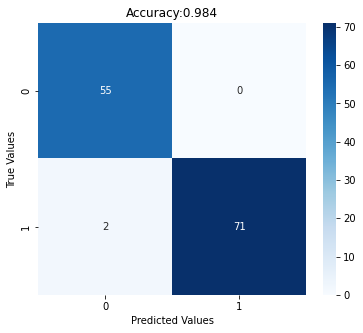

------------------------------------------------------------


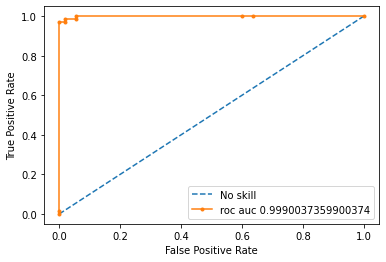

In [30]:
print(classification_report(y_test,y_pred))

print(f'Accuracy Score: {round(accuracy_score(y_test,y_pred),3)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),3)}')
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')

visualize_cf_matrix(y_test,y_pred)
print('-'*60)
ROC_AUC(y_test, y_prob)

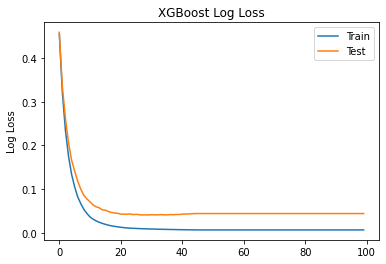

In [38]:
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [33]:
importances = {'Feature': X.columns,
           'Importance': xgb.feature_importances_ 
           }
importances = pd.DataFrame(importances, columns = ['Feature', 'Importance']
)
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Feature,Importance
359,CDR,0.580855
358,MMSE,0.120955
16,aparc-area-lh-stats_lh_lingual_area,0.027698
194,aparc-thickness-rh-stats_rh_inferiortemporal_t...,0.025973
315,aseg-volume-stats_Left-Inf-Lat-Vent,0.021911
...,...,...
125,aparc-meancurv-rh-stats_rh_lingual_meancurv,0.000000
124,aparc-meancurv-rh-stats_rh_lateralorbitofronta...,0.000000
123,aparc-meancurv-rh-stats_rh_lateraloccipital_me...,0.000000
121,aparc-meancurv-rh-stats_rh_insula_meancurv,0.000000


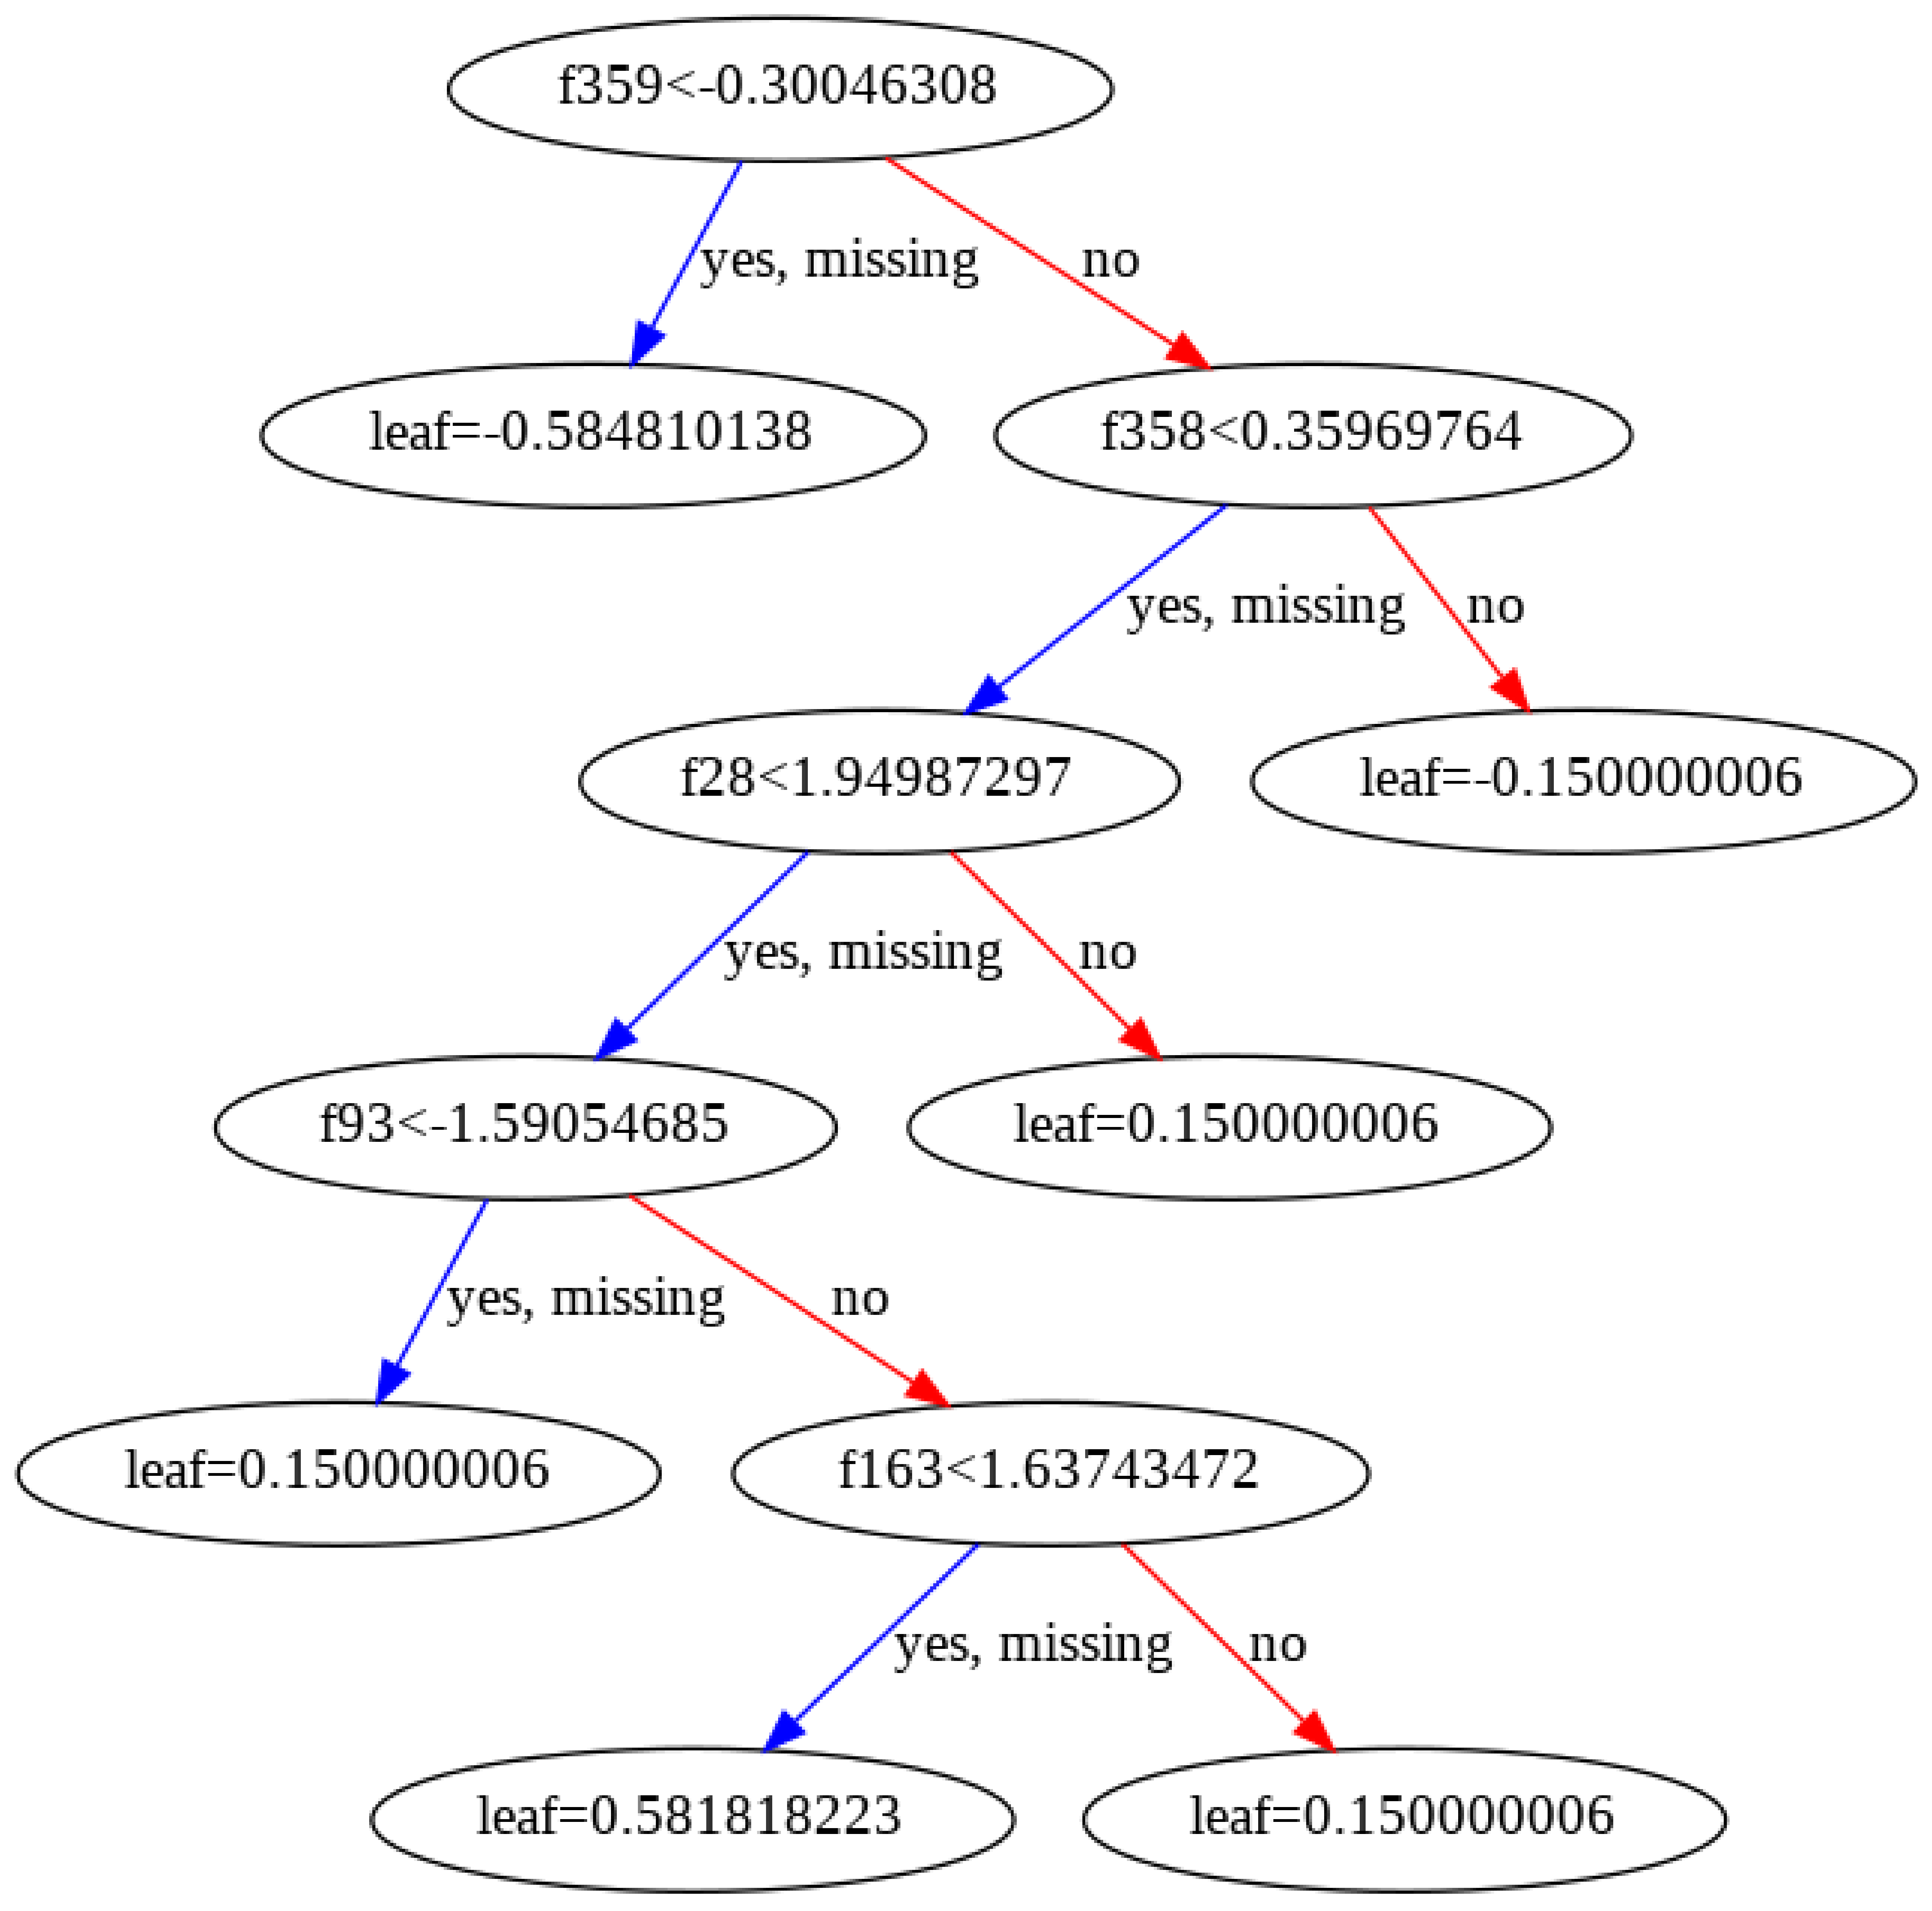

In [40]:
from xgboost import plot_tree
plt.rcParams["figure.figsize"] = (100,200)
plot_tree(xgb)
plt.show()